# Health Care Prediction on Diabetic Patients - Case Study

## Context

This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. Its primary objective is to diagnostically predict whether a patient has diabetes or not based on specific diagnostic measurements. The dataset was carefully selected, focusing on female patients aged at least 21 years and of Pima Indian heritage.

## Problem Statement

Build a model with high accuracy to predict whether patients in the dataset have diabetes.

## Dataset Description

The dataset includes various medical predictor variables and one target variable, "Outcome." The predictor variables encompass essential health metrics, such as the number of pregnancies, plasma glucose concentration, diastolic blood pressure, triceps skinfold thickness, insulin levels, body mass index (BMI), diabetes pedigree function, and age.

### Predictor Variables

1. **Pregnancies:**
   - Number of times pregnant

2. **Glucose:**
   - Plasma glucose concentration at 2 hours in an oral glucose tolerance test

3. **BloodPressure:**
   - Diastolic blood pressure (mm Hg)

4. **SkinThickness:**
   - Triceps skinfold thickness (mm)

5. **Insulin:**
   - 2-Hour serum insulin (mu U/ml)

6. **BMI:**
   - Body mass index (weight in kg/(height in m)^2)

7. **DiabetesPedigreeFunction:**
   - Diabetes pedigree function : The Diabetes Pedigree Function (DPF) is a mathematical function used to assess the risk of diabetes in individuals based on their family history of the disease.

8. **Age:**
   - Age in years

### Target Variable

- **Outcome:**
   - Class variable (0 or 1)
   - 268 instances are labeled as 1 (indicating diabetes), while others are labeled as 0.

This dataset provides a valuable opportunity to develop a predictive model for diabetes based on demographic and health-related features.


### Loading the required Library Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

### Reading and exploring the Health Care Dataset

In [2]:
data=pd.read_csv('health care diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Checking the number of rows and columns of the dataset
data.shape

(768, 9)

In [4]:
# Dataset Information Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Summary Statistics for the Diabetes Dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###  Data Preprocessing: Treating the Missing Values 

### In this datasets 0 represents the null values, and hence we will replace 0 by mean of their feature (variable) columns.

In [6]:
#Identifying the mean of the features
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [7]:
# Finding the number of rows which has the null values
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))
print('BMI-',len(data['BMI'][data['BMI']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374
BMI- 11


In [8]:
# Finding the null value percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


### Inferences from Null Value Percentage Analysis

The analysis of null value percentages in the dataset reveals the following insights:

1. **Glucose:**
   - Approximately 0.65% of the data points in the "Glucose" column are represented as null values.

2. **Blood Pressure:**
   - The "Blood Pressure" column has a null value percentage of approximately 4.56%.

3. **Skin Thickness:**
   - A significant portion of the "Skin Thickness" column, around 29.56%, contains null values.

4. **Insulin:**
   - The "Insulin" column exhibits a higher null value percentage, with approximately 48.70% of the data points being null.

These findings suggest that imputation or other strategies may be necessary for columns with substantial null values, such as "Skin Thickness" and "Insulin," to ensure the integrity of the dataset for subsequent analyses or modeling.

In [9]:
# Replacing the null values with the mean
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])
data['BMI']=data['BMI'].replace([0],[data['BMI'].mean()])

In [10]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


### Inference from Null Value Treatment

After addressing null values in the dataset, it is observed that all selected columns ("Glucose," "Blood Pressure," "Skin Thickness," and "Insulin") no longer contain any null values. The null value treatment has been successful, resulting in a clean dataset with 0% null values in these specific columns.


## Detecting Outliers and Treatment

In [11]:
columns=data[selected_columns]

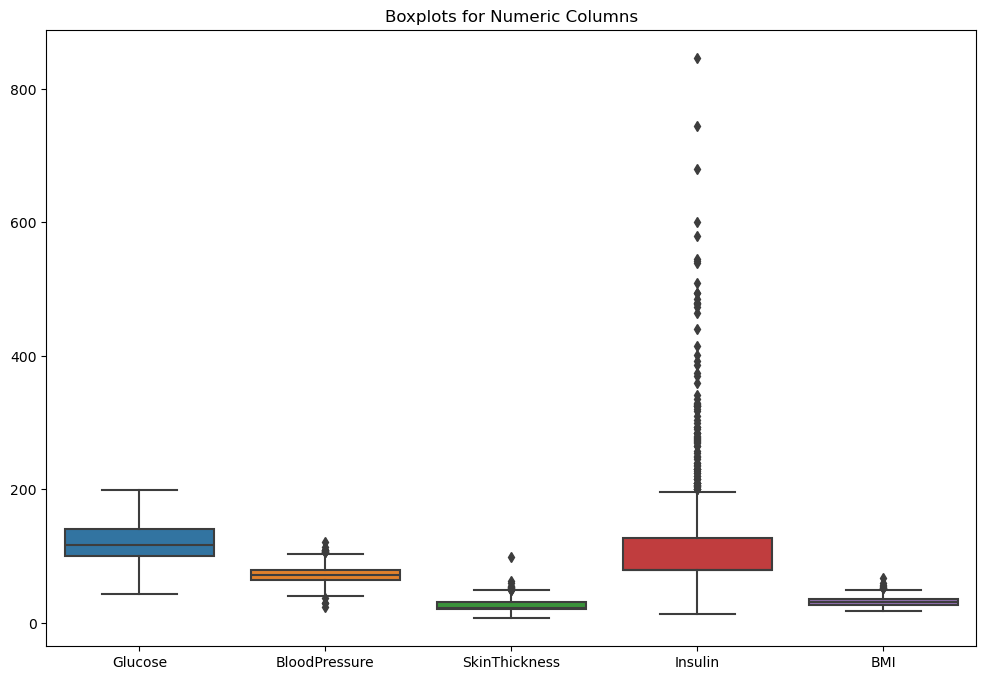

In [12]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89
Number of outliers in the 'BMI' column: 8


### Boxplot Analysis for Numerical Columns

The boxplot illustrates the distribution of four numerical columns: Glucose, BloodPressure, Skin Thickness, and Insulin. The following inferences can be drawn:

#### Glucose
- Median glucose level: ~200 mg/dL
- IQR is large, indicating considerable variability in glucose levels.
- There are no outliers

#### Blood Pressure
- Median blood pressure: 72 mmHg (within the normal range).
- IQR is relatively small, suggesting more consistent blood pressure levels.
- Few outliers, none extremely high or low.

#### Skin Thickness
- Median skin thickness: ~25 mm
- IQR is small, indicating less considerable variability in skin thickness.
- Few outliers, none extremely high.

#### Insulin
- Median insulin level: ~79 mIU/L
- IQR is large, indicating considerable variability in insulin levels.
- More outliers, many are extremely high.

#### Overall Observations
- All columns exhibit a wide range of values, with some outliers. Insulin column has many outliers
- Median values for all columns, except the insulin column fall within the normal range.

#### Additional Inferences
- Glucose levels show more variability than blood pressure levels.
- More outliers in the insulin columns compared to blood pressure and skin thickness.

#### Possible Interpretations
- Variability in glucose levels may be influenced by factors like diet, exercise, and stress.
- Outliers in the Insulin column may also be associated with underlying medical conditions or physiological factors. Elevated insulin levels could be indicative of conditions such as insulin resistance or diabetes. Additionally, factors such as dietary habits, genetic predisposition, or specific medical treatments may contribute to higher insulin levels. Further investigation and domain expertise are necessary to understand the potential health implications of these outliers in the Insulin column. 

It is essential to note that these inferences are based on a single boxplot, and further information is needed to draw definitive conclusions.


## Outlier Treatment

In [15]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [16]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(688, 9)
(768, 9)


In [17]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


### Inferences from Outlier Removal using IQR Method

1. **Data Size Reduction:**
   - After removing outliers using the interquartile range (IQR) method, the dataset has been reduced from 768 to 678 rows.

2. **Outliers Identified:**
   - Outliers were detected and removed across various columns, particularly impacting features like Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, and Age.

3. **Increased Data Robustness:**
   - The IQR-based outlier removal contributes to a more robust dataset, potentially improving the reliability of statistical analyses and modeling.

4. **Preserved Features:**
   - The operation was applied to 9 columns, including predictors like Glucose and Skin Thickness, as well as the target variable Outcome.

5. **Consideration for Domain Knowledge:**
   - The decision to remove outliers should be made with consideration for domain knowledge, as outliers may contain valuable information or indicate specific health conditions.

**Final Dataset Statistics:**
- Dataset size after outlier removal: 678 rows.
- Original dataset size: 768 rows.


In [18]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

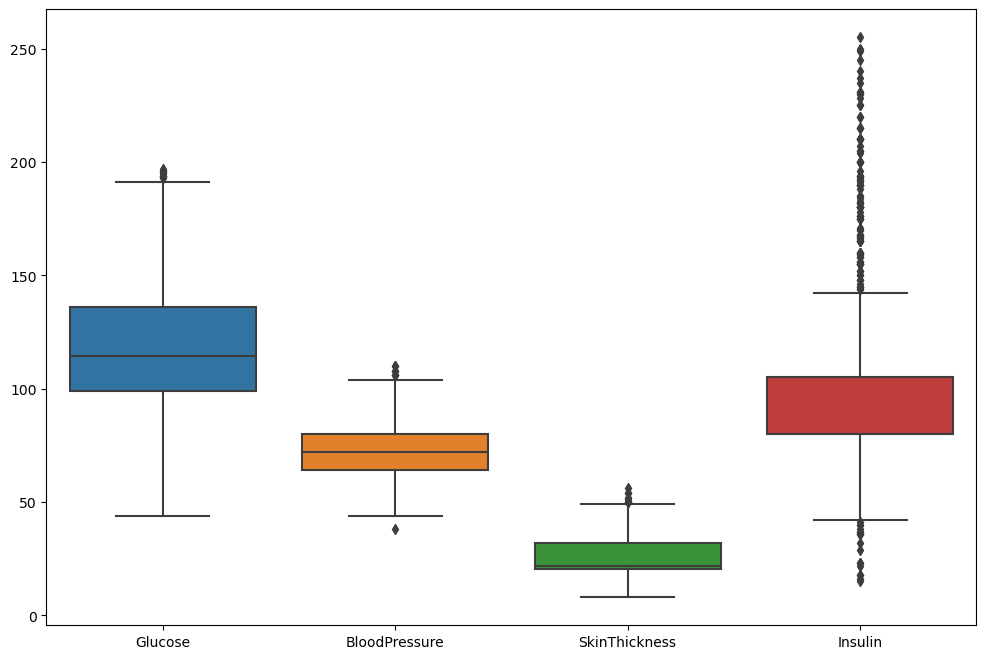

In [19]:
# Checking the outliers after treatment using box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

#### It can be observed that the outliers have been significantly reduced

## EDA - Univariate analysis for each feature

### Visually exploring variables using histograms 

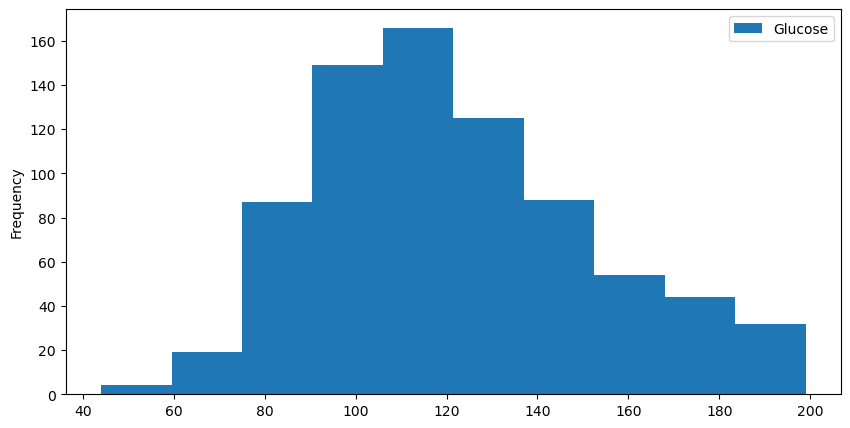

In [20]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

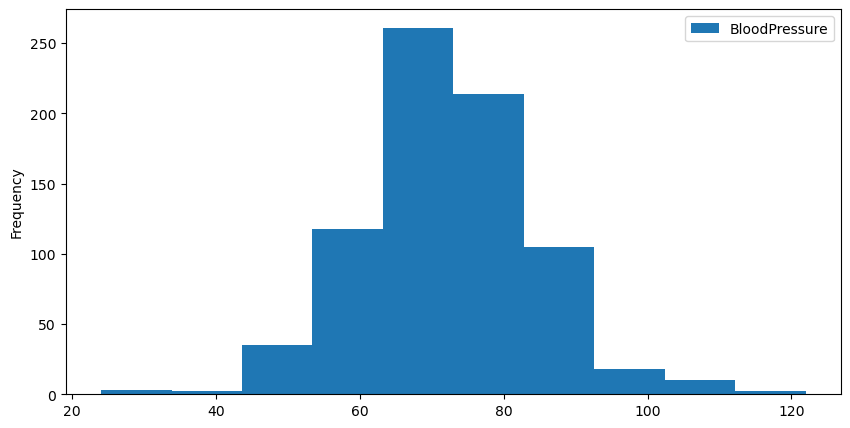

In [21]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

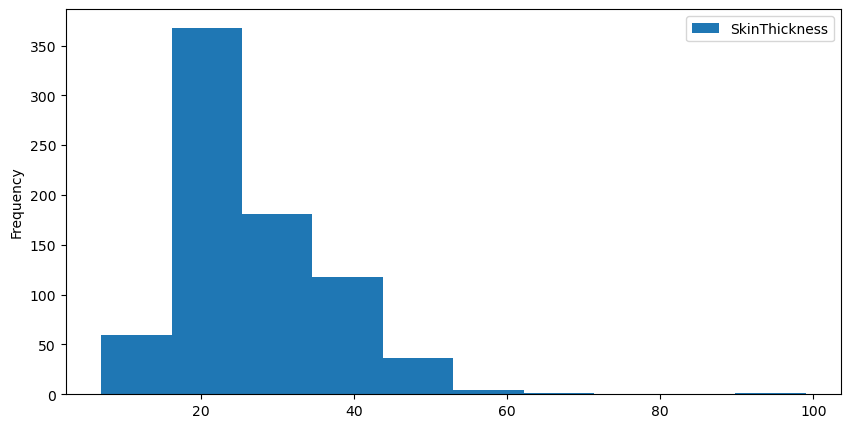

In [22]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5),)
plt.legend()
plt.show()

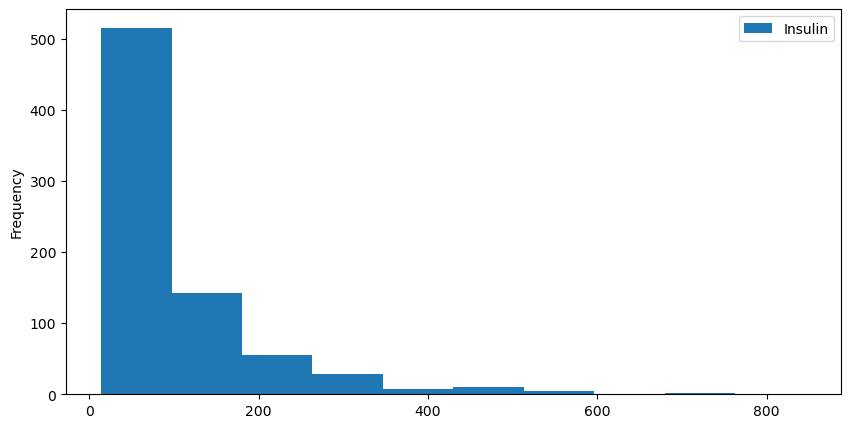

In [23]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

### Violin plot for the selected features

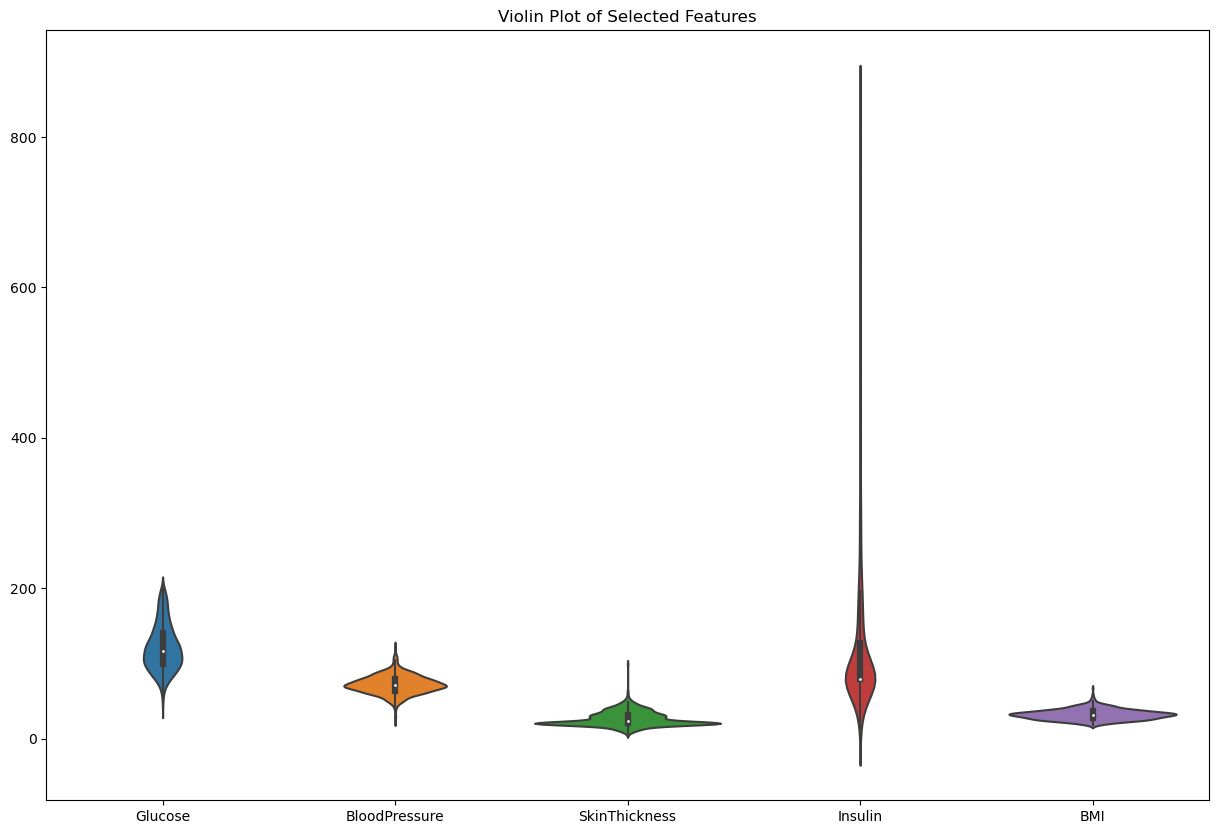

In [24]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot of Selected Features")
plt.show()

#### The violin plot shows the distribution of four numerical features: Glucose, BloodPressure, Skin Thickness, and Insulin. The violin shape represents the probability density function (PDF) of each feature, and the box plot embedded within each violin plot shows the median, interquartile range (IQR), and outliers.

###  Kernel Density Estimation (KDE) plot for the selected features

C:\Users\nates\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nates\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nates\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nates\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

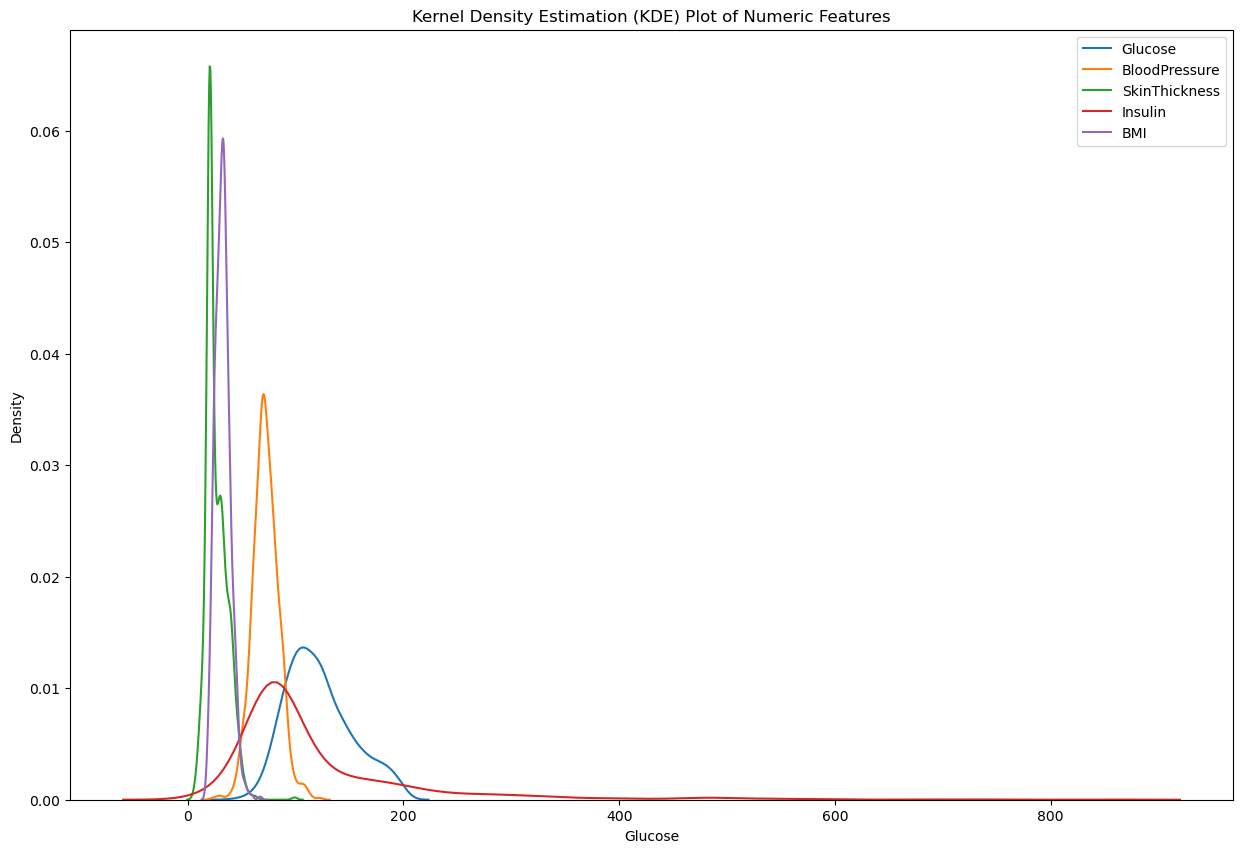

In [25]:
plt.figure(figsize=(15, 10))
for column in selected_columns:
    sns.kdeplot(data[column], label=column)
plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features")
plt.legend()
plt.show()

#### The image shows a Kernel Density Estimation (KDE) plot of four numerical features: Glucose, BloodPressure, Skin Thickness, and Insulin. KDE is a non-parametric method for estimating the probability density function (PDF) of a random variable. The KDE plot shows the estimated PDF of each feature, which can be used to visualize the distribution of the data.

###  Creating a count (frequency) plot describing the data types and the count of variables. 

In [26]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [27]:
data.dtypes.value_counts()

float64    6
int64      3
Name: count, dtype: int64

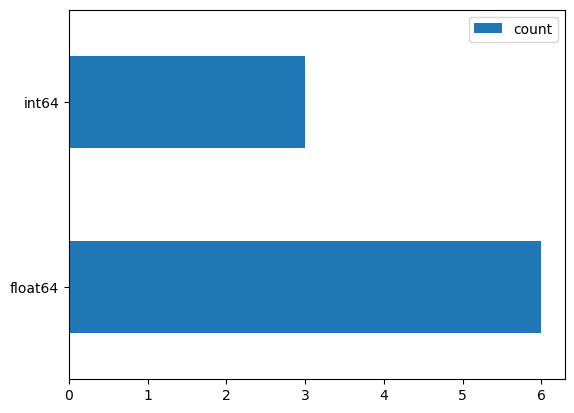

In [28]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

#### It can be Observed that there are three features of integer data type and six features of float data type

### Data Exploration:

### Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [29]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

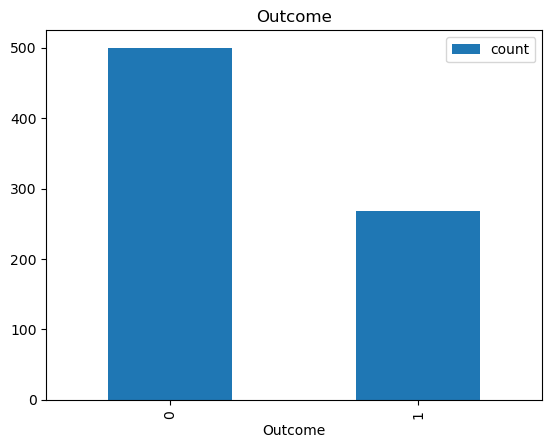

In [30]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [31]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

### Inferences from Outcome Distribution

1. **Class Imbalance:**
   - The dataset exhibits class imbalance in the 'Outcome' variable.
   - Class 0 (No Diabetes) has 500 instances.
   - Class 1 (Diabetes) has 268 instances.

2. **Potential Impact on Modeling:**
   - Class imbalances may affect the performance of machine learning models, particularly for binary classification tasks.
   - Addressing class imbalance through techniques like resampling or using appropriate evaluation metrics may be necessary.

3. **Consideration for Predictive Models:**
   - Models may need to be evaluated and tuned considering the imbalanced distribution to avoid biased predictions toward the majority class.

In [32]:
balanced_data=100-outcome
balanced_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

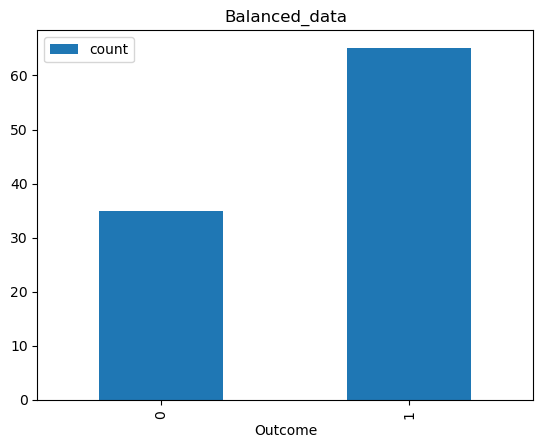

In [33]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')
plt.show()

###  Findings and plan future course of action.

 - We can see It's a Imbalance dataset,This shows that a dataset is biased towards a class(0) in the dataset. If the dataset is biased towards one class, an algorithm trained on the same data will be biased towards the same class,so first we have to balance it.
 - We can use Resampling or SMOTE to balance a dataset.

### Bi-Variate Analysis

###  Creating scatter charts between the pair of variables to understand the relationships.

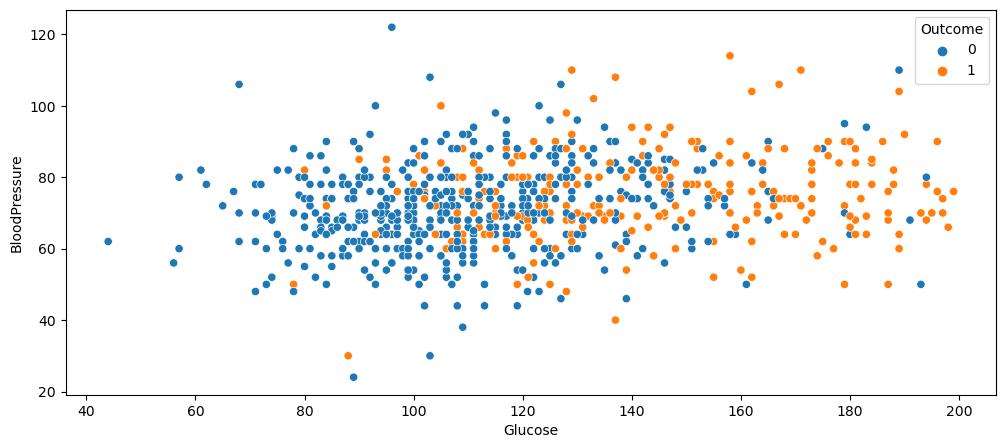

In [34]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

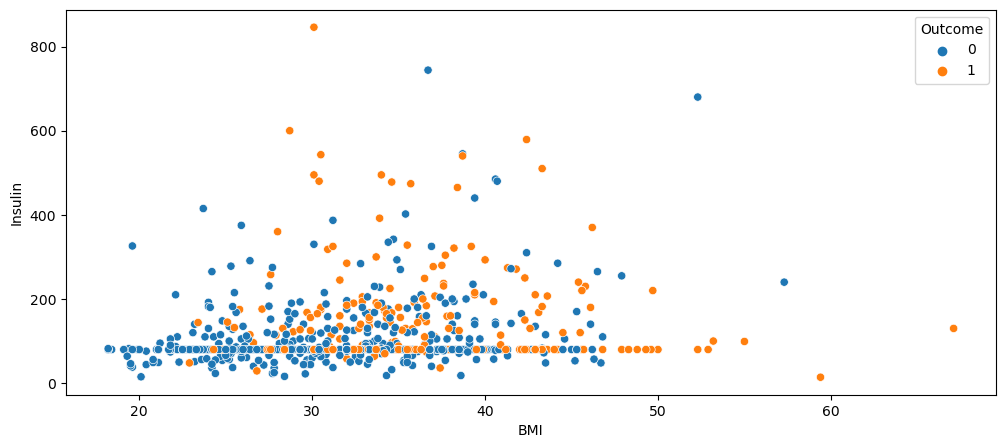

In [35]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.show()

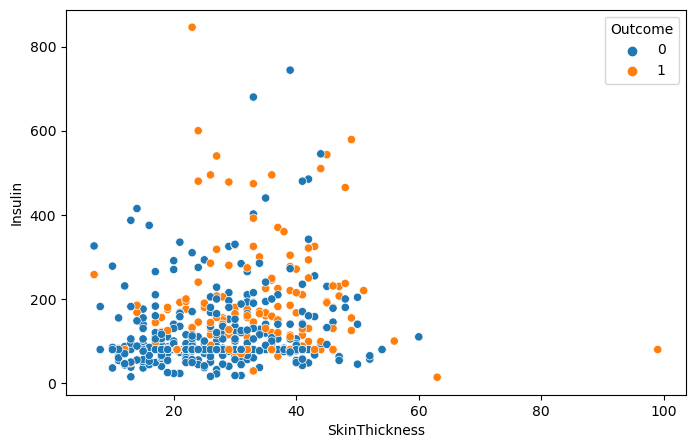

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()

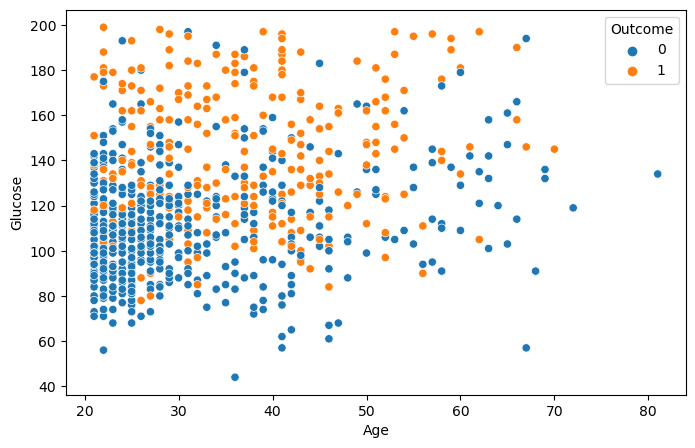

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

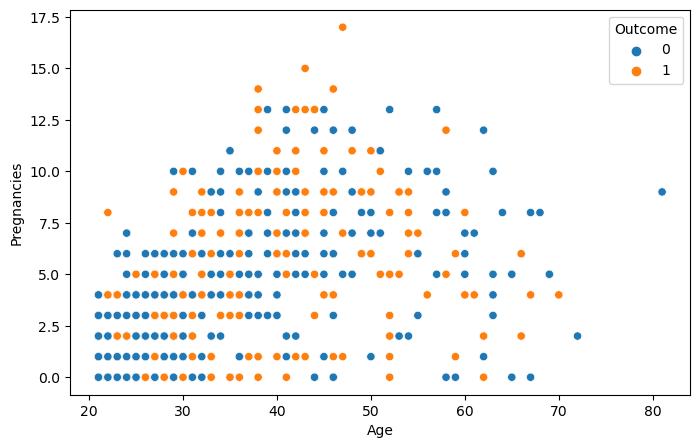

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

- We can see Pregnancies has highest relation with Age feature.
- Also, Outcome has maximum relation with Glucose and minimum with Blood Presure than the other features. 

- We can see from scatter plot, that there is ouliers present in this data.
- Because of outliers, our data is skewed to left or right side, which is not acceptable.
- If we want to train a model, this poses a problem.
- Therefore, for better visualization and outlier detection, we can use sns.boxplot and remove outliers from the dataset.

In [ ]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

### Multi-Variate Analysis

### Perform correlation analysis. Visually explore it using a heat map.

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### We can see Outcome has maximum relation with Glucose and minimum with Blood Presure than the other features. 

## Data Modeling:

###  1- Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

### Feature Selection

In [ ]:
# Data Preparation for Modeling
x=data.drop(['Outcome'],axis=1)
y=data.Outcome

In [ ]:
# Finding the Correlation of every feature with the Outcome (Target Variable)
data.corrwith(data['Outcome'])

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

- We can see BloodPressure features has lowest relation with output column.
- So we will remove BloodPressure for training a good model with high accuracy.

In [ ]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

### SMOTE to address the Class Imbalance

### Train a model 

In [ ]:
# Train-Test Split for Data Modeling
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))
  
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())  
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))
  

print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

In [ ]:
#sc=StandardScaler()

In [ ]:
#trainx=sc.fit_transform(trainx)
#testx=sc.fit_transform(testx)

## Applying an appropriate classification algorithm to build a model.

## Model 1: Building a Logistic Regression Model

In [ ]:
logreg=LogisticRegression(solver='liblinear',random_state=123)

In [ ]:
logreg.fit(trainx_res,trainy_res)

In [ ]:
prediction=logreg.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,prediction))
print('Mean_squared_error -',mean_squared_error(testy,prediction))

In [ ]:
print((confusion_matrix(testy,prediction)))


In [ ]:
print(classification_report(testy,prediction))

In [ ]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = logreg.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Model 2: RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(random_state=42,max_depth=5)

In [ ]:
rf.fit(trainx_res,trainy_res)

In [ ]:
rf_predict=rf.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,rf_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_predict))

### RandomForestClassifier( Hyper Parameter Tuning )

In [ ]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3],
'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}

In [ ]:
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)

In [ ]:
#grid.fit(trainx_res,trainy_res)

In [ ]:
#grid.best_params_

In [ ]:
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3,
 n_estimators= 400,random_state=42)

In [ ]:
rf_grid.fit(trainx_res,trainy_res)

In [ ]:
rf_grid_predict=rf_grid.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))

In [ ]:
print((confusion_matrix(testy,prediction)))

In [ ]:
print(classification_report(testy,prediction))

In [ ]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = rf.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Model 3: DecisionTreeClassifier

In [ ]:
dc=DecisionTreeClassifier(random_state=42)

In [ ]:
dc.fit(trainx_res,trainy_res)

In [ ]:
dc_pred=dc.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,dc_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_pred))

### DecisionTreeClassifier( Hyper Parameter Tunning )

In [ ]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [ ]:
import warnings
warnings.filterwarnings('ignore')
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

In [ ]:
dc_grid.best_params_

In [ ]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1,
min_samples_split= 2,splitter='best',random_state=42)

In [ ]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,dc_final_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_final_pred))

In [ ]:
print((confusion_matrix(testy,dc_final_pred)))

In [ ]:
print((classification_report(testy,dc_final_pred)))

In [ ]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = dc_final.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Model Accuracy Comparison

In [ ]:
Algorithms=['RandomForest','Decisiontree']
Accuracy_Score=[accuracy_score(testy,rf_grid_predict),accuracy_score(testy,dc_final_pred)]
# Create a DataFrame
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})

# Display the accuracy table
print(accuracy_df)

### Inferences from Model Accuracy Comparison

1. **RandomForest Performs Well:**
   - Among the algorithms tested, RandomForest exhibits the highest accuracy at 73.38%.

2. **Consideration for Model Selection:**
   - The choice of the algorithm depends on various factors, including the specific requirements of the task, interpretability, and computational efficiency.

3. **Further Evaluation:**
   - Additional evaluation metrics, such as precision, recall, and F1 score, should be considered for a comprehensive assessment of model performance.